In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/raw/train.csv')


In [3]:
df.head()          # First 5 rows
df.info()          # Data types and nulls
df.describe()      # Summary stats for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


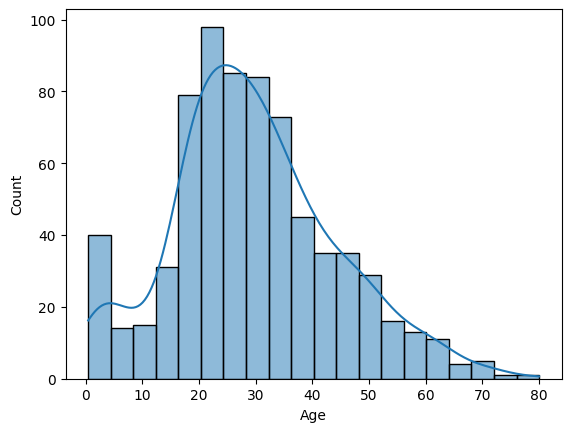

In [4]:
sns.histplot(df['Age'], kde=True)
plt.show()

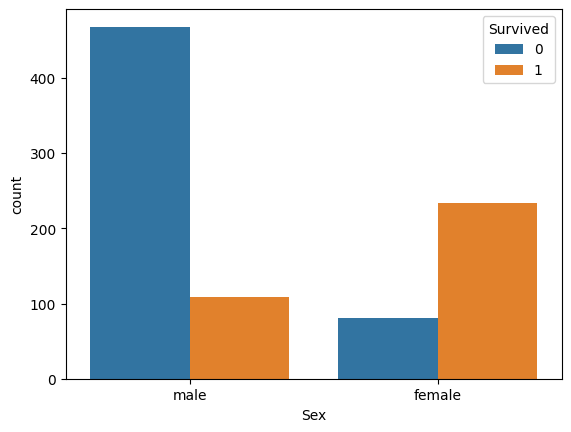

In [5]:

sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

In [6]:
df.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**Data Cleaning & Feature engineering!**

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].median(), inplace = True)

/var/folders/kh/6zfs0f2938757htwb1gh131c0000gn/T/ipykernel_83165/3612560828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

/var/folders/kh/6zfs0f2938757htwb1gh131c0000gn/T/ipykernel_83165/1994620826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [10]:
df.drop(columns = ['Cabin'], inplace = True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Encoding Categorical Variables

In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [13]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first = True)

Create New Features!

In [14]:
#family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [15]:
#fair per person
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

We can drop columns we don't plan on using

In [16]:
df.drop(columns=['Name','Ticket','PassengerId'], inplace = True )

**Baseline Models!**

In [17]:
#inporting necesary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
#set the input(features) and output to predit as "survived"
X = df.drop(columns='Survived') #features
y = df['Survived']              #target

In [19]:
#Train/Test Split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Training a logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)

In [21]:
#Evaluate logistic regression Baseline model
print("Logistic Regression Accuracy:" , accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("clasification Report: \n", classification_report(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
clasification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [22]:
#Training a decision tree model
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [23]:
#evaluate decision tree model
print("Decision Tree Accuracy: \n", accuracy_score(y_test, y_pred_dt))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report: \n", classification_report(y_test,y_pred_dt))

Decision Tree Accuracy: 
 0.7821229050279329
Confusion matrix: 
 [[86 19]
 [20 54]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179




**MODEL EVALUATION AND IMPROVEMENT**

In [24]:
#importing the modules for randomforest and gradient boosting
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix


In [25]:
#Training a random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

In [26]:
#Evaluating the random forest
print("RF Classification Report:\n", classification_report(y_test, y_pred_rf))
print("RF ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("RF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


RF Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

RF ROC-AUC: 0.8978120978120978
RF Confusion Matrix:
 [[90 15]
 [16 58]]


In [27]:
#Training a gradient boosting classfier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:,1]




In [28]:
#Evaluating a gradient boosting classifier
print("GB Classification Report:\n", classification_report(y_test, y_pred_gb))
print("GB ROC-AUC:", roc_auc_score(y_test, y_proba_gb))
print("GB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


GB Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

GB ROC-AUC: 0.8993564993564993
GB Confusion Matrix:
 [[94 11]
 [20 54]]


**HYPERPARAMETER TUNING**

In [29]:
#Tunning gradient boost classification model
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [30]:
#Defining which hyperparameters to tune
param_grid ={
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [31]:
#Using cross validation to try all combination of parameters
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # or 'roc_auc'
    n_jobs=-1  # run in parallel)
      )


In [32]:
#Train the adjusted model
grid_search.fit(X_train,y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [33]:
#check best model and performance
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8202107751403528


In [34]:
#evaluate model on test set
best_model = grid_search.best_estimator_

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

Confusion Matrix:
 [[94 11]
 [20 54]]
ROC AUC Score: 0.8990990990990991


In [35]:
#saving the best model locally
import joblib
joblib.dump(best_model, 'model.pkl')

['model.pkl']

**Documentation and plots**


In [36]:
#importing libraries for plotting data
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 

y_probs = best_model.predict_proba(X_test)[:, 1] # take the probabilty for class 1(survived)
fpr , tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

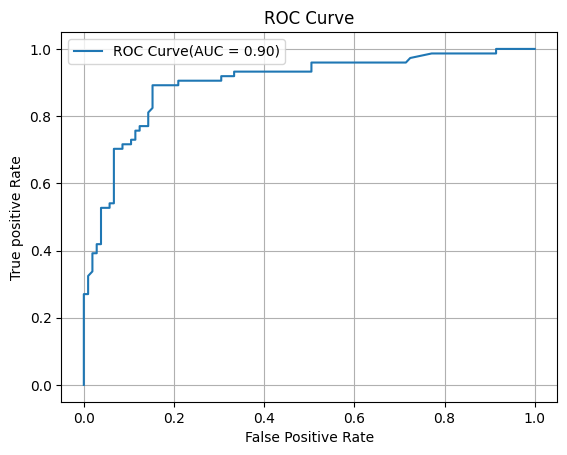

In [37]:
#Plotting ROC curve with matplotlib
plt.plot(fpr, tpr, label = f'ROC Curve(AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel("True positive Rate")
plt.legend()
plt.title('ROC Curve')
plt.grid()
plt.show()

In [38]:
#importing pandas library 
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#using pandas to organise feature importance
importances = best_model.feature_importances_
feature_names = X_train.columns
feat_df = pd.Series(importances, index = feature_names).sort_values()

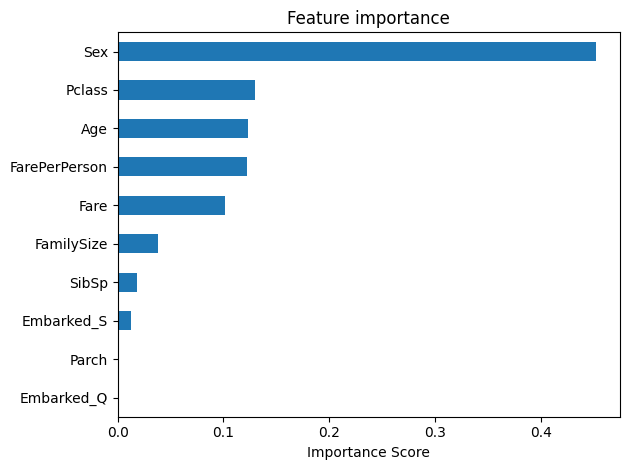

In [40]:
#customization for plotting
feat_df.plot(kind = 'barh')
plt.title("Feature importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()